## DEEP LEARNING PRACTICAL ASSIGNMENT #1

---
#Linear Classifier : Perceptron 


---
#Theorical section : 


1.  **What is the computational/time complexity of the basic perceptron algorithm ?**


Time complexity or computational complexity  is the amount of time taken by an algorithm to run. It is proportional to :

*   n :the number of the iterations.

*   m :the number of instances in each iteration


The time complexity of the perceptron algorithm is **O(n*m)**. 



2.   **What is the space complexity of the basic perceptron algorithm ?**


 The space complexity is the amount of memory that we need to execute the algorithm. In the case of the basic Perceptron algorithm, the total space complexity is **O(m*d)**







---


## Practical section 
# Libraries Installation :

In [1]:
!pip install matplotlib==3.2.2
!pip install numpy==1.19.5
!pip install scikit_learn==1.0
!pip install pandas==1.1.5

     |████████████████████████████████| 23.1 MB 1.8 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


#Libraries Importation :

In [2]:
# Numpy for mathematical functions with arrays
import numpy as np
# Sklearn for machine learning and statistical modeling tools
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
#pandas for manipulating data frames
from pandas import DataFrame
# Matplotlib to display graphes and figures
import matplotlib.pyplot as plt



---


# The perceptron function implementation :

In [3]:
def perceptron(X, Y, epochs):

  # m : number of training examples
  # n : number of features
  m, n = X.shape

  # Initilizing theta to 0
  theta = np.zeros(n)
  #Creating weights list
  w = [] 
  w.append(theta)
  
  # Iterating through the epochs
  for e in range(epochs):
    # Itterating and getting the index of each training example
    for xi, yi in zip(X, Y):
      # New value of theta
      if (np.dot(theta,xi.T)*yi) <=0:
        theta = theta+np.dot(yi,xi)

    # Returning theta if the perceptron algorithm converges
    if (np.array_equal(w[-1], theta)) :
      return theta

  # Saving the theta value in the weights list
  w.append(theta)
  # Returning theta even if the perceptron algorithm doesn't converge
  return theta

# Toy dataset generation function :

In [4]:
def generateDataSet(sigma1, sigma2) :

  # mu1 and mu2 initialization   
  mu1 = [-1, 0]
  mu2 = [1, 0]
  x = np.zeros((250,2))
  
  #Generating the labels
  y=[-1 if i<126 else 1 for i in range(250)]
  y = np.array(y)

  # Generating the Gaussian distribution of the first 125 examples 
  for i in range(125) : 
    x[i]=np.random.normal(mu1, sigma1, (1,2))

  # Generating the Gaussian distribution of the last 125 examples
  for i in range(125, 250) :
    x[i]=np.random.normal(mu2, sigma2, (1,2))

  #Shuffuling the examples and the labels
  x,y=shuffle(x,y)

  return x,y

# The plot decision boundary function

In [51]:
def  plot_decision_boundary(X,Y,w):
  # Configuring the figure
  plt.figure(figsize=(5,3))

  #Defining the limits of the axis
  xx=np.linspace(np.amin(X[:,:1]),np.amax(X[:,:1]))

  #Plotting the examples as well as their labels
  scatter = plt.scatter(X[:,0],X[:,1],c=Y)

  #The equation of the line of decision boudary is y=mx+c with m=-(w0/w1) and c=0
  m=-(w[0]/w[1])

  #Plotting the decision boudary
  for i in xx:
    y = m*i
    plt.plot(i, y,'bo')
    plt.legend(*scatter.legend_elements(),title = "Classes",loc="upper right")

# The prediction function's implementation

In [44]:
def predict(x, w):
  y_pred = np.inner(x,w)
  for i,pred in enumerate(y_pred) :
    if pred > 0 :
        y_pred[i] = 1
    else :
        y_pred[i] = -1
  return(y_pred)

# The accuracy function's implementation

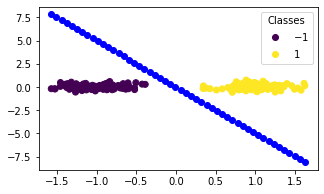

In [52]:

x,y=generateDataSet(0.25,0.25)
#Splitting the data into a training and test set
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)
w=perceptron(X_train,Y_train,5)
plot_decision_boundary(X_train,Y_train,w)

In [46]:
Y_pred =predict(X_test,w)
accuracy_score(Y_test,Y_pred)

0.98



---
# Experimentations section

# Experiment 1

Dataset for sigma1=sigma2=0.25



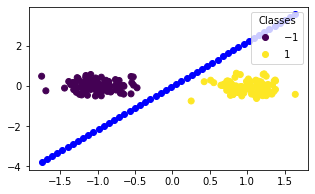

In [54]:
#Generating the dataset
x,y=generateDataSet(0.25,0.25)

#Splitting the data into a training and test set
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#Generating the weights
w=perceptron(X_train,Y_train,5)

#Plotting the decision boundary
plot_decision_boundary(X_train,Y_train,w)

#Predicting the labels of the test set
Y_pred =predict(X_test,w)

The accuracy of the model is : 1.0
Plotting the decision boudary for the test set


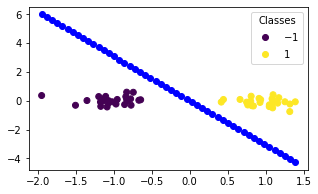

In [49]:
#Printing the accuracy of the model using the test set
print("The accuracy of the model is :" , accuracy_score(Y_test,Y_pred))
#Plotting the decision boudary for the test set
print('Plotting the decision boudary for the test set')
plot_decision_boundary(X_test,Y_test,w)

# Answers : 


1.   **Does the algorithm converges? Why?**
Yes the algorithm does converge since the data points can be separated in two classes, so they are linearly separable
2.   **Plot the decision boundary found by your algorithm. Is this decision boundary unique? Does changing the initialisation changes the result of the algorithm?** No the decision boundary is unique only for a fixed initialisation of the weight and the data points. But when we rerun the algorithm new weights and new data points are generated depending on the initialisations leading to a different decision boudary.
3.   **Compute the accuracy of the classification on the test set. Plot the decision boundary on the test set.** The decision boundary separtes the data points of the test set perfectly and it gives an accuracy of almost 1






---
# Experiment 2
Dataset for sigma1=sigma2=0.75


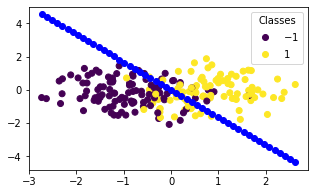

In [59]:
#Generating the dataset
x,y=generateDataSet(0.75,0.75)

#Splitting the data into a training and test set
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#Generating the weights
w=perceptron(X_train,Y_train,5)

#Plotting the decision boundary
plot_decision_boundary(X_train,Y_train,w)

#Predicting the labels of the test set
Y_pred =predict(X_test,w)

The accuracy of the model is : 0.9
Plotting the decision boudary for the test set


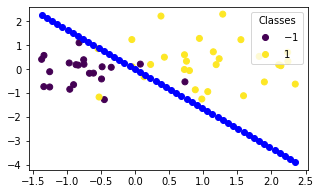

In [60]:
#Printing the accuracy of the model using the test set
print("The accuracy of the model is :" , accuracy_score(Y_test,Y_pred))
#Plotting the decision boudary for the test set
print('Plotting the decision boudary for the test set')
plot_decision_boundary(X_test,Y_test,w)

#Answers
1.   **Does the algorithm converges? Why?**
No the algorithm does not converge, because the data points can't be separated in two classes, they overlap each other so they are not linearly separable. This is due to the high variance of the data points.
2.   **Plot the decision boundary found by your algorithm. Is this decision boundary unique? Does changing the initialisation changes the result of the algorithm?** Like we said in the previous experience, the decision boundary depends on the weight and datapoints and their initialisations
3.   **Compute the accuracy of the classification on the test set. Plot the decision boundary on the test set.** The decision boundary couldn't separte the data points well, this can be even deducted from the value of the accuracy that fell to 0.9




---
#Experiment 3

*   Generating the data then training the model then computing the error of the test set 
*   Plotting the results of the errors



In [68]:
def GetVarAndMean(n):

  errors = []
  for i in range(nb_experiment):
    X, Y = generateDataSet(n, n)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    w = perceptron(X_train, Y_train, 10)
    Y_pred =predict(X_test,w)
    acc = accuracy_score(Y_test,Y_pred)
    #Calculating the error from the accuracy since 1-error=accuracy
    error=1-acc

    #Adding the error to the list
    errors.append(error)

  #Calculating the mean of the errors
  mean = np.mean(errors)

  #Calculating the variance of the errors
  var = np.var(errors)

  return var, mean

Text(0.5, 1.0, 'Errorbar')

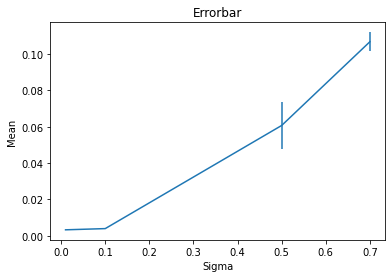

In [74]:
sigmas = np.array([0.01, 0.1, 0.5, 0.7])
nb_experiment = 30
means = []
vars = []
for sigma in sigmas:
  var, mean = GetVarAndMean(sigma)
  vars.append(var)
  means.append(mean)

# Plotting the errorbar
plt.errorbar(sigmas,y=means, yerr=vars)
plt.xlabel('Sigma')
plt.ylabel('Mean')
plt.title('Errorbar')

# Conclusion : 
The mean of the errors increases as the value of sigma in the gaussian distribution increases too. Even in the first and second experiences we saw that increasing sigma from 0.25 to 0.75 caused the data points to be non-linearly separable and to make it harder to the algorithm to get right predictions. The smallest values of sigmas, in the intervall [0.0 , 0.1], seem to give better accuracy and better predictions.